In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

In [46]:
f = h5py.File("../trainset_eval_j0zwbgns.h5")
infos = pd.DataFrame({k: np.array(v).flatten() for k,v in f["info"].items()})
status = f["status"][:, :]
clip_labels = f["clip_labels"][:]

infos["clip_label"] = (np.tile(clip_labels, (250,1)).T).flatten() #I _think_ I got the axis order correct here
infos["status"] = status.flatten()

Text(0, 0.5, 'Global error (mm)')

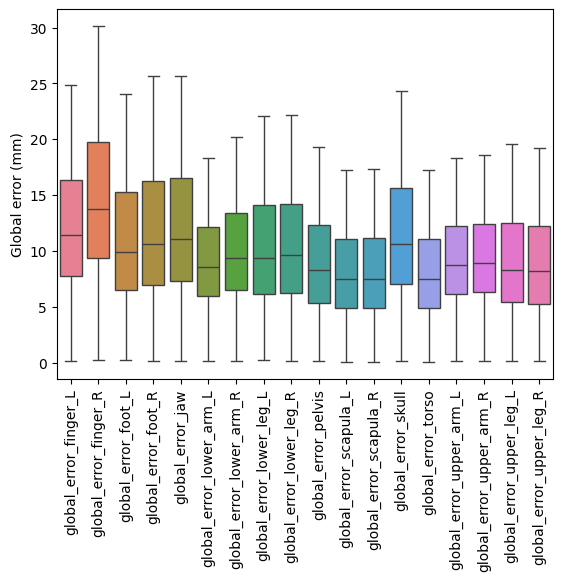

In [19]:
global_errors = infos[[c for c in infos.columns if c.startswith("global_error")]]
sns.boxplot(global_errors*1e3, whis=1, log_scale=False, showfliers=False)
plt.xticks(rotation=90)
plt.ylabel("Global error (mm)")

In [25]:
status.shape

(842, 250)

In [40]:
lbls = np.tile(clip_labels, (250,1)).T

In [66]:
infos.columns

Index(['actuator_force_sum_sqr', 'alt_joint_reward', 'alt_joint_vel_reward',
       'angle_to_target', 'appendages_reward', 'cumulative_reward',
       'distance_from_spawpoint', 'foot_L_error', 'foot_R_error',
       'global_error_finger_L', 'global_error_finger_R', 'global_error_foot_L',
       'global_error_foot_R', 'global_error_jaw', 'global_error_lower_arm_L',
       'global_error_lower_arm_R', 'global_error_lower_leg_L',
       'global_error_lower_leg_R', 'global_error_pelvis',
       'global_error_scapula_L', 'global_error_scapula_R',
       'global_error_skull', 'global_error_torso', 'global_error_upper_arm_L',
       'global_error_upper_arm_R', 'global_error_upper_leg_L',
       'global_error_upper_leg_R', 'jaw_error', 'joint_error', 'joint_reward',
       'joint_vel_error', 'joint_vel_reward', 'lifetime', 'lower_arm_L_error',
       'lower_arm_R_error', 'target_distance', 'target_frame', 'target_vec_x',
       'target_vec_y', 'target_vec_z', 'torso_x', 'torso_y', 'torso_z',


In [67]:
groups = pd.Series({
    "global_error_finger_L": "Forepaw",
    "global_error_finger_R": "Forepaw",
    "global_error_skull": "Head",
    "global_error_jaw": "Head",
    "global_error_foot_L": "Hindpaw",
    "global_error_foot_R": "Hindpaw",
    "global_error_torso": "Torso",
    "foot_L_error": "Hindpaw",
    "foot_R_error": "Hindpaw",
    "lower_arm_L_error": "Forepaw",
    "lower_arm_R_error": "Forepaw",
    "jaw_error": "Head",
}, name="body_group")
refframes = pd.Series({
    "global_error_finger_L": "Global",
    "global_error_finger_R": "Global",
    "global_error_skull": "Global",
    "global_error_jaw": "Global",
    "global_error_foot_L": "Global",
    "global_error_foot_R": "Global",
    "global_error_torso": "Global",
    "foot_L_error": "Pose",
    "foot_R_error": "Pose",
    "lower_arm_L_error": "Pose",
    "lower_arm_R_error": "Pose",
    "jaw_error": "Pose",
}, name="refframe")
grouped = infos.melt(id_vars=["clip_label", "status"]).join(groups, how="right", on="variable")
grouped = grouped.join(refframes, how="right", on="variable")
grouped["value"] *= 1000 #Meter to millimeter

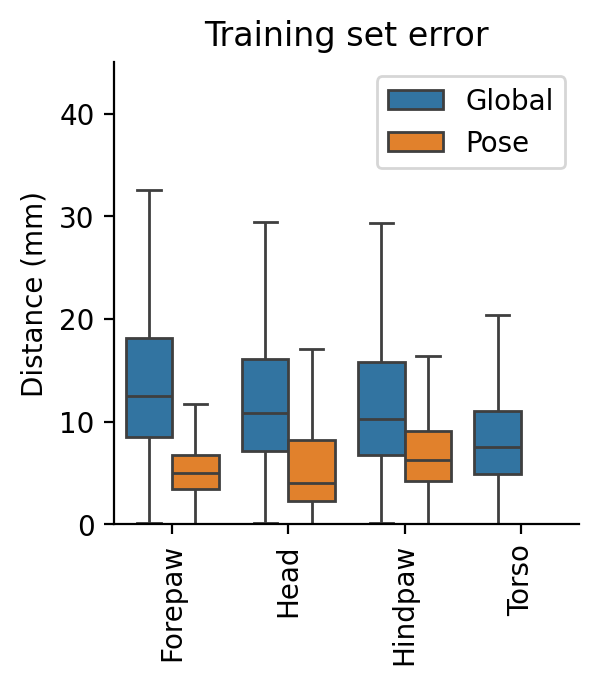

In [73]:
plt.figure(figsize=(3, 3), dpi=200)
sns.boxplot(data=grouped, x="body_group", y="value", hue="refframe", showfliers=False)
plt.xticks(rotation=90)
plt.ylabel("Distance (mm)")
plt.xlabel("")
plt.title("Training set error")
plt.ylim(0, 45)
plt.legend(title="")
sns.despine()